In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import openai
import yaml

from utils import *

import autoKG_full as AKG

In [10]:
with open("config.yaml", 'r') as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)


COMPLETIONS_MODEL = params["OPENAI_API_MODEL"]
EMBEDDING_MODEL = params["EMBEDDING_MODEL"]
my_api_key = params["OPENAI_API_KEY"]
openai.api_key = my_api_key

os.environ['OPENAI_API_KEY'] = my_api_key
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

OLLAMA_BASE_URL = params["OLLAMA_BASE_URL"]

In [11]:
KG_class_chat = AKG.autoKG(texts=None,
                           source=None,
                           embedding_model=EMBEDDING_MODEL,
                           llm_model=COMPLETIONS_MODEL,
                           openai_api_key=OPENAI_API_KEY,
                           main_topic=None,
                           ollama_base_url=OLLAMA_BASE_URL,
                           embedding=False)

In [12]:
KG_class_chat.load_data(os.path.join('KG_data', 'ref_paper_KG.npy'), include_texts=True)

Successfully load from KG_data\ref_paper_KG.npy


In [13]:
query = """
Please tell me how to use pre-trained language models to construct a knowledge graph.
"""
record = KG_class_chat.KG_prompt(query,
                                 search_nums=(15, 7, 3, 4, 2),
                                 search_mtd='pair_dist',
                                 use_u=False)
response, keywords_info, ref_info, all_tokens = KG_class_chat.completion_from_record(
                               record,
                               output_tokens=1024,
                               prompt_language='English',
                               show_prompt=False,
                               prompt_keywords=False,
                               include_source=False,
                               )

In [14]:
print(all_tokens)
print(response)


1534
<think>
Okay, so I need to figure out how to use pre-trained language models (PLMs) to build a knowledge graph. Let's start by understanding what each component is and how they might work together.

First, from the texts provided, it seems like there are some optimization steps involved with parameters related to virtual type words and answer words. They mention optimizing these with a high learning rate, which probably helps in fine-tuning the model for specific tasks. Then, using these optimized parameters, they tune the PLM further with a smaller learning rate. This two-step process might be crucial for adapting the model to extract knowledge effectively.

Next, the texts talk about extracting triplets from text chunks by focusing on entities in a set E. They mention that when E is large, GPT-3.5 struggles to stick to those entities and often includes others not in the set. To solve this, they use an iterative process where each iteration focuses on a different entity in E. Thi

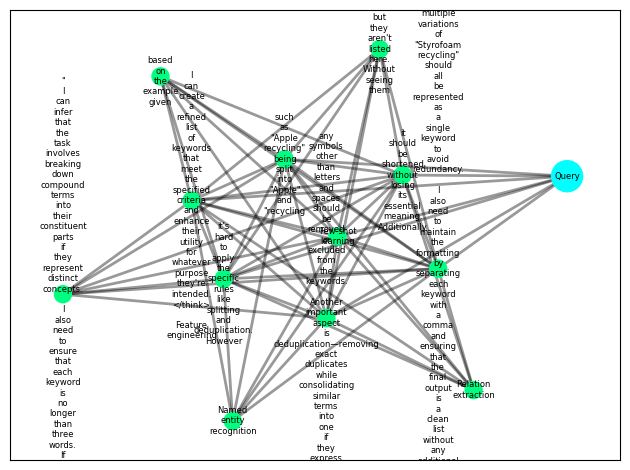

<Figure size 640x480 with 0 Axes>

In [15]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=False,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis.png')


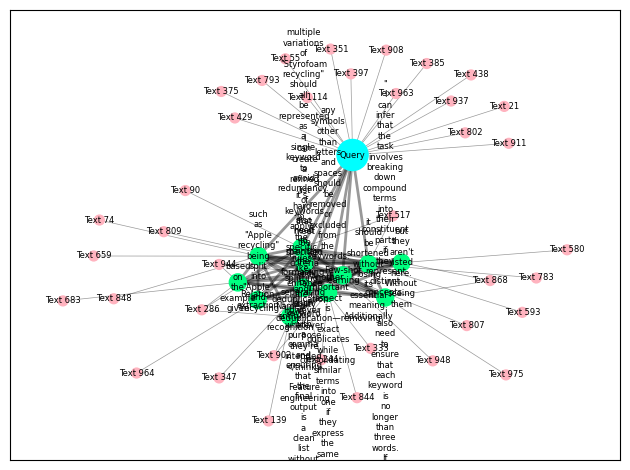

<Figure size 640x480 with 0 Axes>

In [16]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=True,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis_text.png')